In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
sys.path.insert(0,os.path.join(os.path.abspath('../')))

In [3]:
from time import time
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import hgmm
from hgmm.histogram_gmm import HistogramGaussianMixture
from hgmm.utilities import *

In [4]:
data_path = os.path.join(os.path.join(os.path.abspath('../')),'data')

In [5]:
len(get_filenames_in_dir(os.path.join(data_path, 'ams')))

40

### Load files into a combined DataFrame

In [6]:
file_names = get_filenames_in_dir(os.path.join(data_path, 'ams'))
fraglen_count_dict = merge_fragcount_files(os.path.join(data_path,'ams'), file_names)

In [7]:
np.array(list(fraglen_count_dict.values())).sum()

1617078815

In [8]:
fraglen_counts_df = create_df_from_dict(fraglen_count_dict, ['frag_len', 'count'])

In [9]:
fraglen_counts_df['count'].sum()

1617078815

In [10]:
# __ =plt.hist(fraglen_counts_df['frag_len'], bins=fraglen_counts_df.shape[0]//25, weights=fraglen_counts_df['count'])

<AxesSubplot:xlabel='frag_len', ylabel='Count'>

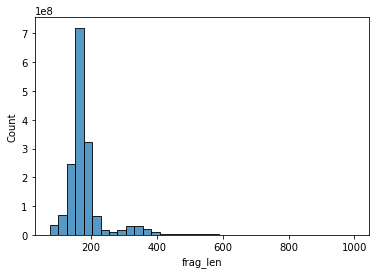

In [11]:
import seaborn as sns

sns.histplot(data=fraglen_counts_df, x='frag_len', weights='count', bins=fraglen_counts_df.shape[0]//25)

### Explore multiple components fitting (optional)

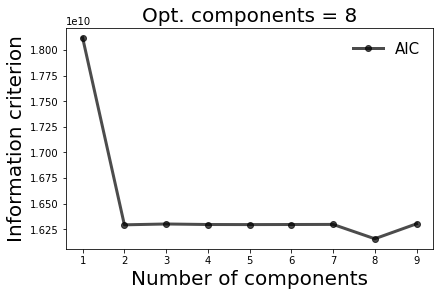

In [12]:
x = fraglen_counts_df.values
opt_ic = explore_optimal_componentsnumber(x, max_ncomponents=9, inf_criterion='aic', random_state=42)

### Fit HistogramGaussianMixture model

In [13]:
# x has shape (unique_samples, nfeatures + 1) where the last column is the count of each unique sample in the data
x = fraglen_counts_df.values

# we can use explore_optimal_componentsnumber() function to get optimal values
# or user-specified
n_optimal = 4

tick = time()
# create HGMM model
hgmm = HistogramGaussianMixture(n_components=n_optimal, 
                                max_iter=1000,
                                random_state=42, 
                                covariance_type = 'full',
                                init_params='kmeans')
hgmm.fit(x)
tock = time()
print('time spent', tock-tick)

time spent 0.07662034034729004


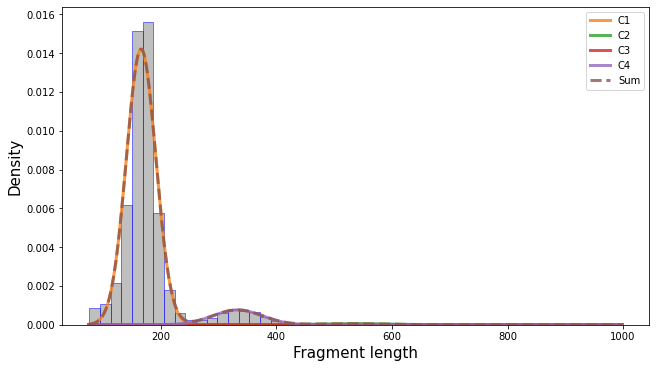

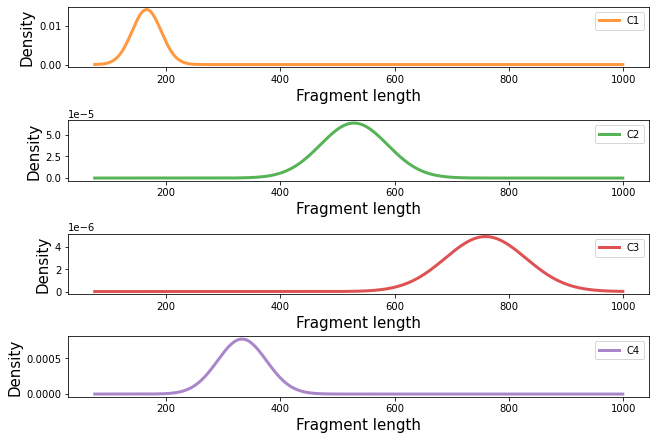

In [14]:
plot_1D_hgmm_res(hgmm, x)

In [15]:
print_model_parameters('hgmm', hgmm)


~~~~~~~~~~~~~~~
model_type: hgmm
gmm.covariances_:
 [[[ 648.80542633]]

 [[3443.61359032]]

 [[4978.01185928]]

 [[1834.0871077 ]]]
gmm.means_:
 [[165.82831038]
 [528.62614645]
 [758.82701152]
 [332.72607   ]]
gmm.weights_:
 [9.07424286e-01 9.36411766e-03 8.74467885e-04 8.23371284e-02]
~~~~~~~~~~~~~~~



### Predict the label (or probability distribution) of the samples

In [16]:
hgmm.predict(x)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [17]:
hgmm.predict_proba(x)

array([[9.99999574e-001, 2.71102181e-013, 8.00866453e-022,
        4.26129738e-007],
       [9.99999573e-001, 2.69376142e-013, 8.00375652e-022,
        4.26991832e-007],
       [9.99999572e-001, 2.67996119e-013, 8.00958046e-022,
        4.28282053e-007],
       ...,
       [5.19016277e-226, 5.63559747e-011, 1.00000000e+000,
        2.64281353e-048],
       [1.51113316e-226, 5.15976535e-011, 1.00000000e+000,
        1.92964218e-048],
       [4.39382098e-227, 4.72368647e-011, 1.00000000e+000,
        1.40843723e-048]])